# Template for new controller

Note that all imports and controller related functions should be contained in a single cell/file.

In [7]:
# Import standard modules
import sys
import pandas as pd
from pyomo.environ import Objective, minimize

# Import DOPER modules (only relevant ones to new model)
from doper.models.basemodel import base_model, convert_base_model
from doper.models.batterymodel import add_battery, convert_battery

# Setup Optimization Model
def control_model(inputs, parameter):
    model = base_model(inputs, parameter)
    model = add_battery(model, inputs, parameter)
    
    def objective_function(model):
        return model.sum_energy_cost * parameter['objective']['weight_energy'] \
               + model.sum_demand_cost * parameter['objective']['weight_demand'] \
               + model.sum_export_revenue * parameter['objective']['weight_export'] \
               + model.sum_regulation_revenue * parameter['objective']['weight_regulation']
    model.objective = Objective(rule=objective_function, sense=minimize, doc='objective function')
    return model

# Setup Result Conversion Model
def pyomo_to_pandas(model, parameter):
    df = convert_base_model(model, parameter)
    df = pd.concat([df, convert_battery(model, parameter)], axis=1)
    return df

# Test it
if __name__ == '__main__':
    import os
    # Import DOPER modules (relevant to execution and plotting)
    from doper import DOPER, get_solver, get_root, standard_report
    from doper.example import example_parameter_evfleet, example_inputs
    from doper.models.basemodel import plot_standard1
    from doper.models.batterymodel import plot_battery1
    
    # Setup exmaple controller
    parameter = example_parameter_evfleet()
    data = example_inputs(parameter, load='B90', scale_load=150, scale_pv=100)
    solver_path = get_solver('cbc', solver_dir=os.path.join(get_root(), 'solvers'))
    smartDER = DOPER(model=control_model,
                     parameter=parameter,
                     solver_path=solver_path,
                     pyomo_to_pandas=pyomo_to_pandas)

    # Conduct optimization
    res = smartDER.do_optimization(data)
    duration, objective, df, model, result, termination, parameter = res
    print(standard_report(res))

ImportError: cannot import name 'convert_base_model' from 'doper.models.basemodel' (/usr/local/lib/python3.8/dist-packages/doper/models/basemodel.py)

### Result for Site

In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

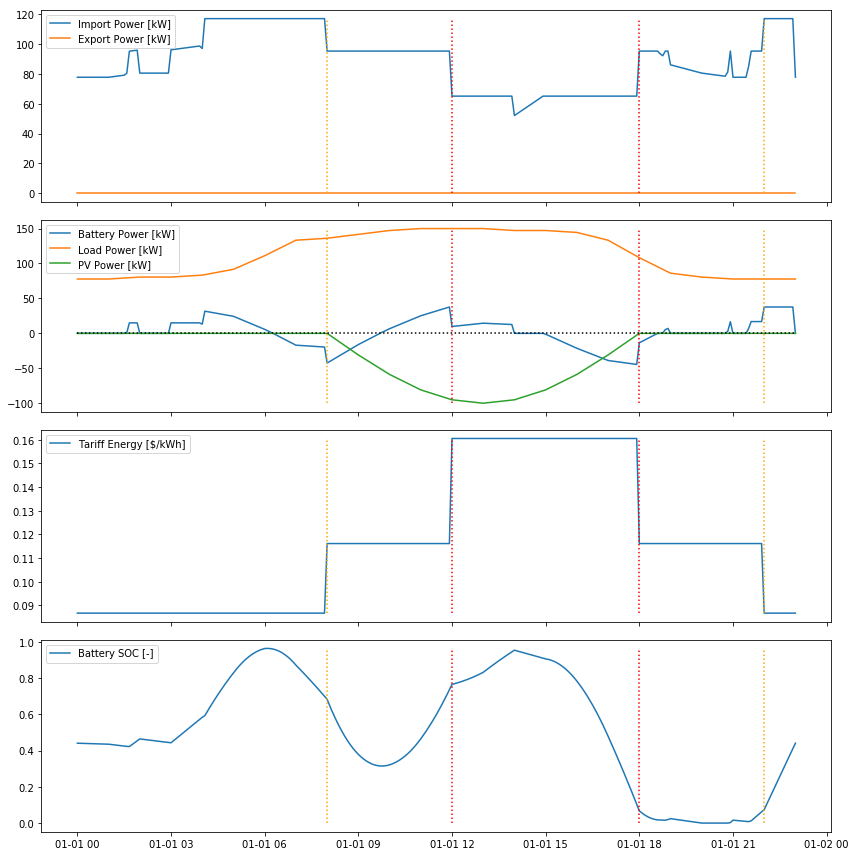

In [3]:
plot_standard1(df, plot_reg=False)

### Result for Electric Vehicle Fleet

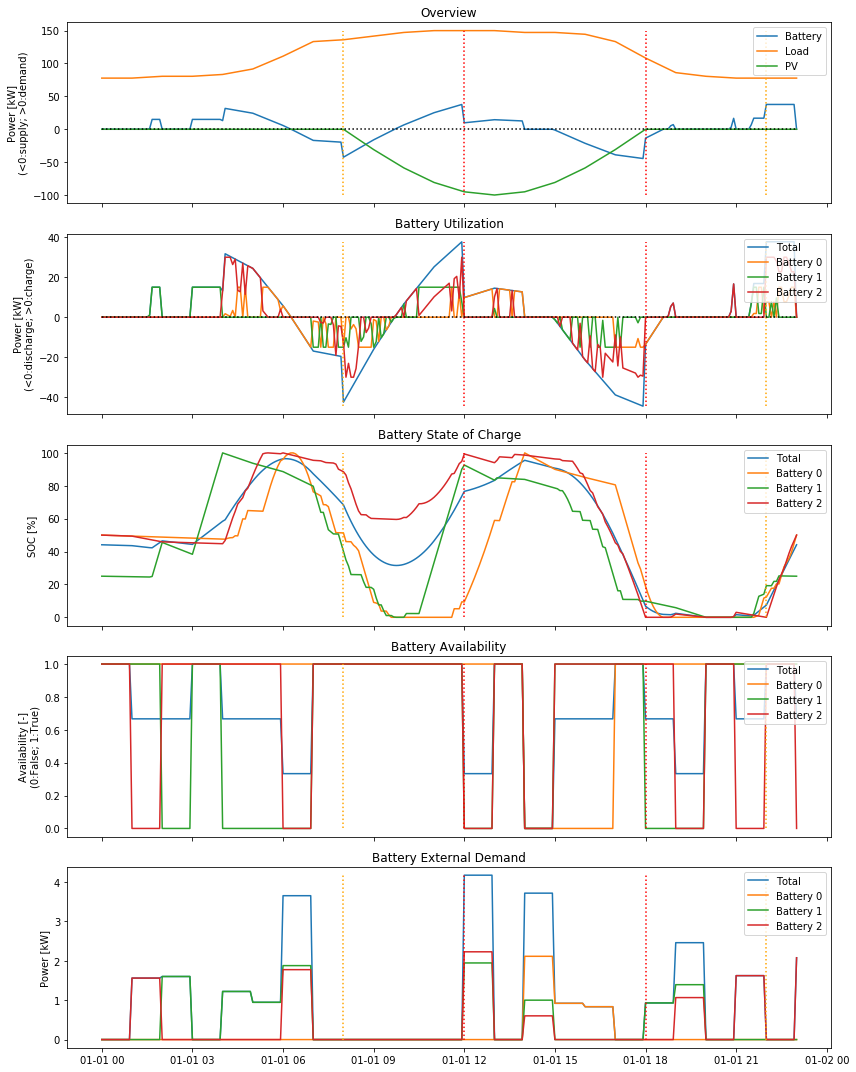

In [4]:
plot_battery1(df, model)